In [2]:
# WARNING FOR HELP WITH YFINANCE IN 2025 SEE THIS VIDEO : https://youtu.be/037_883wHGo?si=q1wuu8qXLMlXbeWd

import yfinance as yf  # Import the yfinance library for downloading financial data
import pandas as pd  # Import pandas for data manipulation
import importlib  # Import importlib for reloading modules
from datetime import datetime
from pandas.tseries.offsets import DateOffset
import utils  # Import a custom module named utils
importlib.reload(utils)  # Reload the utils module to ensure it's updated

# List of asset symbols to download historical data for.
assets = []
assets = [
    "SPY",
    "ISRG",        # Intuitive Surgical
    "SYK",         # Stryker Corporation
    "EL.PA",       # EssilorLuxottica 
    "VEEV",        # Veeva Systems Inc 
    "RMD",         # ResMed Inc.
    "DHR",         # Danaher Corporation
    "TXN",         # Texas Instruments
    "COH.AX",      # Cochlear Limited
    "PME.AX",      # Pro Medicus Limited
    "STMN.SW",     # Straumann Holding AG
    "7741.T",      # HOYA Corporation 
    "EQS.PA",      # Pharmagest Interactive SA
    "EW",          # Edwards Lifesciences Corporation
    "4543.T",      # Terumo Corporation
    "7747.T",      # Asahi Intecc Co., Ltd
    "GRMN",         # Garmin 
    "TMO",          # Thermo Fisher Scientific Inc
    #"EUZ.DE",        # Eckert 
    #"LMAT",          #Le Maître Vascular
    "NXU.DE",         #Nexus
    "SECT-B.ST",      #Sectra AB
    "7716.T",         #Nakanishi Inc
    #"2175.T"         #SMS.co
]

start_date = datetime(2013, 12, 1)
end_date = datetime(2024, 12, 31)

# Download monthly adjusted closing prices for each asset within the defined date range
monthly_price_data = yf.download(assets, interval="1mo", start=start_date, end=end_date)["Close"]

# Print a success message to confirm that data for all assets was imported
print("Monthly prices for all selected assets have been successfully imported.")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  21 of 21 completed

Monthly prices for all selected assets have been successfully imported.


In [2]:
from utils import TotalReturnIndexCalculator  # Import the TotalReturnIndexCalculator class from the utils module

# Initialize an instance of the TotalReturnIndexCalculator class
totalreturnindexcalculator = TotalReturnIndexCalculator()

# Initialize a dictionary to store the annual returns for each asset
annual_returns_dict = {}
monthly_returns_dict = {}

# Calculate the annual returns for each asset using monthly price data
for asset in assets:
    # Calculate annual simple returns for the current asset and store them in the dictionary
    annual_returns_dict[asset] = totalreturnindexcalculator.annual_simple_returns(monthly_price_data[asset])
    monthly_returns_dict[asset] = totalreturnindexcalculator.monthly_simple_returns(monthly_price_data[asset])

# Print a confirmation message to indicate successful calculation
print("Annual returns for all assets have been successfully calculated and stored.")

Annual returns for all assets have been successfully calculated and stored.


In [5]:
from utils import Calculator  # Import the Calculator class from the utils module

# Initialize an instance of the Calculator class
calculator = Calculator()

# Download T-Bill rates (expressed in annualized percentage points)
t_bill_data = yf.download("^IRX", interval="1d", start=pd.to_datetime(start_date) + DateOffset(months=1), end=end_date)["Close"]["^IRX"]

annual_avg = t_bill_data.groupby([t_bill_data.index.year]).mean()
monthly_avg = t_bill_data.groupby([t_bill_data.index.year, t_bill_data.index.month]).mean()

annual_t_bill_returns = list((annual_avg / 100))  # Convert to decimal
monthly_t_bill_returns = list((monthly_avg / 100))

monthly_rf_rates = [(1 + rate) ** (1/12) - 1 for rate in monthly_t_bill_returns]

rf = calculator.mean(monthly_rf_rates)

annual_excess_returns = {}
#monthly_excess_returns = {}
for asset in assets:
    annual_excess_returns_asset = []
    #monthly_excess_returns_asset = []
    for i in range(0, len(annual_returns_dict[asset])):
        annual_excess_returns_asset.append(annual_returns_dict[asset][i] - annual_t_bill_returns[i])
    annual_excess_returns[asset] = annual_excess_returns_asset
    #for j in range(0, len(monthly_returns_dict[asset])):
        #monthly_excess_returns_asset.append(monthly_returns_dict[asset][i] - monthly_t_bill_returns[i])
    #monthly_excess_returns[asset] = monthly_excess_returns_asset  

# Initialize dictionaries to store calculated metrics for each asset
mean_dict = {}  # Dictionary for arithmetic mean of returns
standard_deviation_dict = {}  # Dictionary for standard deviation of returns
sharpe_ratio_dict = {}  # Dictionary for Sharpe Ratio of returns

# Calculate metrics for each asset and store in corresponding dictionaries
for asset in assets:
    mean_dict[asset] = calculator.mean(annual_returns_dict[asset])  # Arithmetic mean of annual returns
    standard_deviation_dict[asset] = calculator.standard_deviation(annual_returns_dict[asset])  # Standard deviation of annual returns
    sharpe_ratio_dict[asset] = calculator.sharpe_ratio(annual_excess_returns[asset])  # Sharpe Ratio using the risk-free rate

# Create a DataFrame to display the calculated metrics for each asset
df = pd.DataFrame({
    "Asset": list(mean_dict.keys()),  # List of asset names
    "Arithmetic Mean": list(mean_dict.values()),  # Arithmetic mean of returns for each asset
    "Standard Deviation": list(standard_deviation_dict.values()),  # Standard deviation of returns for each asset
     "Sharpe Ratio": list(sharpe_ratio_dict.values())  # Sharpe Ratio for each asset
})

# Print the DataFrame with calculated metrics for each asset
print(df)

[*********************100%***********************]  1 of 1 completed

        Asset  Arithmetic Mean  Standard Deviation  Sharpe Ratio
0         SPY         0.141219            0.148559      0.856992
1        ISRG         0.282043            0.245692      1.088736
2         SYK         0.175537            0.136288      1.174248
3       EL.PA         0.138163            0.181423      0.673083
4        VEEV         0.242302            0.364456      0.618240
5         RMD         0.191406            0.210789      0.814777
6         DHR         0.225738            0.265115      0.763949
7         TXN         0.186398            0.181088      0.907572
8      COH.AX         0.193533            0.203006      0.871500
9      PME.AX         0.810725            0.589515      1.351484
10    STMN.SW         0.268704            0.384266      0.644661
11     7741.T         0.225961            0.218975      0.956806
12     EQS.PA         0.151109            0.341767      0.383902
13         EW         0.237311            0.327827      0.657844
14     4543.T         0.1

In [26]:
geometric_mean_dict = {}  # Dictionary for geometric mean of returns
for asset in assets:
    geometric_mean_dict[asset] = calculator.geometric_mean(annual_returns_dict[asset])  # Geometric mean of annual returns

# Create a DataFrame to display the calculated metrics for each asset
df = pd.DataFrame({
    "Asset": list(mean_dict.keys()),  # List of asset names
    "Geometric Mean": list(geometric_mean_dict.values()),  # Geometric mean of returns for each asset
})

# Print the DataFrame with calculated metrics for each asset
print(df)

        Asset  Geometric Mean
0         SPY        0.130612
1        ISRG        0.255625
2         SYK        0.167261
3       EL.PA        0.124097
4        VEEV        0.186323
5         RMD        0.170389
6         DHR        0.197565
7         TXN        0.172251
8      COH.AX        0.175388
9      PME.AX        0.719304
10    STMN.SW        0.202017
11     7741.T        0.204348
12     EQS.PA        0.104399
13         EW        0.189646
14     4543.T        0.164844
15     7747.T        0.168848
16       GRMN        0.182724
17        TMO        0.154145
18     EUZ.DE        0.197321
19     NXU.DE        0.189568
20  SECT-B.ST        0.326369
21     7716.T        0.097855
22     2175.T        0.102018


        Asset      Beta  P-Value Beta  CAPM Expected Return
0         SPY  1.000000  0.000000e+00              0.011226
1        ISRG  1.250434  9.567010e-18              0.013709
2         SYK  0.886625  3.594618e-17              0.010102
3       EL.PA  0.790709  6.946424e-14              0.009151
4        VEEV  1.000400  8.143957e-07              0.011230
5         RMD  0.601324  7.833811e-05              0.007273
6         DHR  0.838852  5.335478e-09              0.009628
7         TXN  1.025067  2.139201e-21              0.011475
8      COH.AX  0.528971  3.567451e-05              0.006556
9      PME.AX  0.950567  1.016488e-04              0.010736
10    STMN.SW  1.036625  4.104283e-12              0.011589
11     7741.T  0.697400  1.032316e-06              0.008226
12     EQS.PA  0.740821  1.300515e-06              0.008656
13         EW  0.959225  1.958677e-08              0.010822
14     4543.T  0.492297  2.263779e-04              0.006192
15     7747.T  0.603323  8.068853e-04   

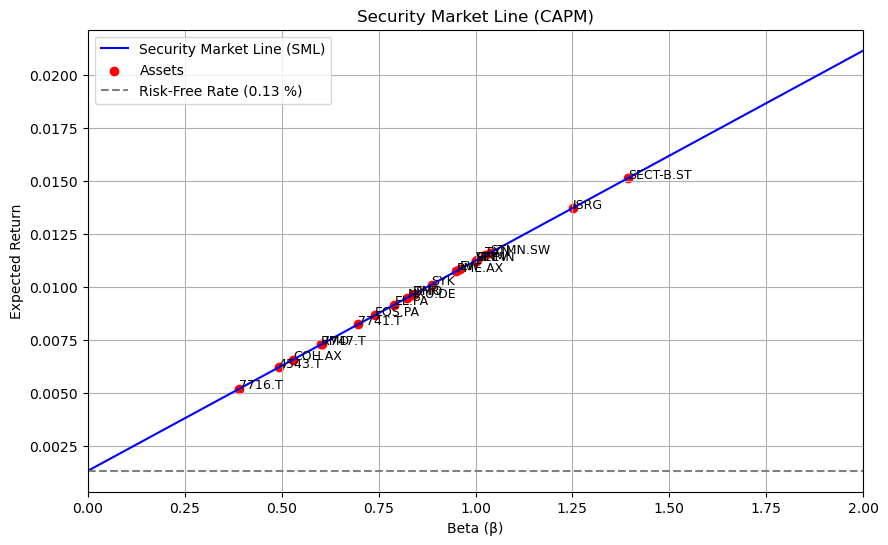

In [11]:
from utils import Capm  # Import the Capm class from the 'utils' module.

# Initialize an instance of the Capm class
capm = Capm()  # Create an object of the Capm class to access its methods.

# Initialize a dictionary to store CAPM metrics for each asset
capm_dict = {}  # This dictionary will hold CAPM metrics for all assets.

# Calculate CAPM metrics for each asset in comparison to the SPY (used as the market benchmark)
for asset in assets:  
    # For each asset in the list of assets:
    # - Perform CAPM regression using:
    #   1. The asset's annual returns (`annual_returns_dict[asset]`),
    #   2. The market benchmark's annual returns (`annual_returns_dict['SPY']`),
    #   3. The risk-free rate (`rf`).
    capm_dict[asset] = capm.regression(monthly_returns_dict[asset], monthly_returns_dict['SPY'], rf)

# Create a DataFrame to display the calculated CAPM metrics for each asset
df = pd.DataFrame({  # Create a pandas DataFrame from the CAPM dictionary.
    "Asset": list(capm_dict.keys()),  # Add a column for asset names (keys of the dictionary).
    "Beta": [v['beta'] for v in capm_dict.values()],  # Extract the beta coefficient for each asset.
    "P-Value Beta": [v['p_beta'] for v in capm_dict.values()],  # Extract the p-value of beta.
    "CAPM Expected Return": [v['capm_expected_return'] for v in capm_dict.values()],  # Extract the expected return.
})

# Print the DataFrame with CAPM metrics for each asset
print(df)  # Display the DataFrame containing the CAPM results for all assets.

mean_market_return = calculator.mean(monthly_returns_dict["SPY"])
# Approximate the mean market return using the average return of the SPY (benchmark).

# Use the Capm class's draw_sml method to plot the Security Market Line (SML)
capm.draw_sml(
    rf,  # Risk-free rate.
    mean_market_return,  # Mean market return (SPY in this case).
    [v['beta'] for v in capm_dict.values()],  # List of beta values for all assets.
    [v['capm_expected_return'] for v in capm_dict.values()],  # List of expected returns for all assets.
    list(capm_dict.keys())  # List of asset names for labeling the plot.
)

        Asset  Capm Expected Return         Alpha  P-Value Alpha  \
0         SPY              0.011226 -1.517883e-18       0.084987   
1        ISRG              0.013709  8.796572e-03       0.117382   
2         SYK              0.010102  4.615270e-03       0.256701   
3       EL.PA              0.009151  2.318257e-03       0.581301   
4        VEEV              0.011230  8.578273e-03       0.319921   
5         RMD              0.007273  8.974068e-03       0.173757   
6         DHR              0.009628  8.063613e-03       0.179162   
7         TXN              0.011475  3.810723e-03       0.341118   
8      COH.AX              0.006556  9.129134e-03       0.099245   
9      PME.AX              0.010736  4.282922e-02       0.000084   
10    STMN.SW              0.011589  7.185316e-03       0.236068   
11     7741.T              0.008226  1.003623e-02       0.099659   
12     EQS.PA              0.008656  2.779084e-03       0.669456   
13         EW              0.010822  7.838232e-0

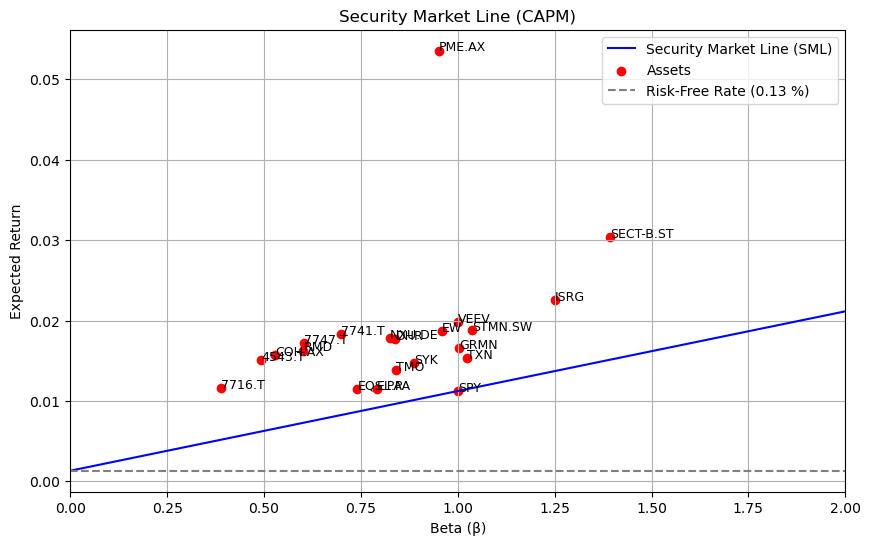

In [9]:
# Create a DataFrame to display the calculated CAPM metrics for each asset
df = pd.DataFrame({  # Initialize a pandas DataFrame with columns based on the CAPM results.
    "Asset": list(capm_dict.keys()),  # Add a column for asset names (keys from the CAPM dictionary).
    "Capm Expected Return": [v['capm_expected_return'] for v in capm_dict.values()],  
    # Add a column for the expected return of each asset based on the CAPM formula.
    "Alpha": [v['alpha'] for v in capm_dict.values()],  
    # Add a column for alpha values (excess return not explained by the market).
    "P-Value Alpha": [v['p_alpha'] for v in capm_dict.values()],
    # Add a column for p-values of alpha (statistical significance of alpha).
    "Alpha Adjusted Expected Return": [v['alpha_adjusted_expected_return'] for v in capm_dict.values()]
    # Add a column for the adjusted expected return that includes both CAPM expected return and alpha.
})

# Print the DataFrame with CAPM metrics for each asset
print(df)  # Display the DataFrame to summarize the calculated CAPM metrics for all assets.

# Use the Capm class's draw_sml method to plot the Security Market Line (SML)
capm.draw_sml(
    rf,  # Risk-free rate: a required parameter for plotting the SML.
    mean_market_return,  # Mean market return: typically derived from SPY as a proxy for the market portfolio.
    [v['beta'] for v in capm_dict.values()],  # Extract beta values for all assets for the SML plot.
    [v['alpha_adjusted_expected_return'] for v in capm_dict.values()],  
    # Use alpha-adjusted expected returns for plotting points on the SML.
    list(capm_dict.keys())  # Provide the list of asset names for labeling the points on the SML plot.
)
